1. First method

You can simply download the dataset from [here](https://www.kaggle.com/c/microsoft-malware-prediction/data) and upload it using the following command.\
(More time consuming)

In [ ]:
from google.colab import files

files.upload()

{}

2. Second method \
(faster)

In order to link your kaggle account to google colab:
1. You have to download your kaggle.json file from "Account" tab in your profile in kaggel by clicking on "create API token"

2. Then run the below codes and upload the downloaded kaggle.json file  here.

In [ ]:
from google.colab import files

files.upload()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


Run the following code inorder to download the dataset (You can also find the command on the main web page of the dataset [here](https://www.kaggle.com/c/microsoft-malware-prediction/data).)

In [ ]:
!kaggle competitions download -c microsoft-malware-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Unzip the data and start doing your practice.

In [ ]:
!unzip train.csv.zip

unzip:  cannot find or open train.csv.zip, train.csv.zip.zip or train.csv.zip.ZIP.


Importing the data

In [ ]:
import pandas as pd

Here I read the 20000 rows of the data since it was a huge dataset to load.

In [ ]:
df = pd.read_csv('train.csv', nrows=20000)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,w

Handling the missing values

In [ ]:
df.isnull().sum()

MachineIdentifier                            0
ProductName                                  0
EngineVersion                                0
AppVersion                                   0
AvSigVersion                                 0
                                          ... 
Census_IsPenCapable                          0
Census_IsAlwaysOnAlwaysConnectedCapable    163
Wdft_IsGamer                               650
Wdft_RegionIdentifier                      650
HasDetections                                0
Length: 83, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  20000 non-null  object 
 1   ProductName                                        20000 non-null  object 
 2   EngineVersion                                      20000 non-null  object 
 3   AppVersion                                         20000 non-null  object 
 4   AvSigVersion                                       20000 non-null  object 
 5   IsBeta                                             20000 non-null  int64  
 6   RtpStateBitfield                                   19929 non-null  float64
 7   IsSxsPassiveMode                                   20000 non-null  int64  
 8   DefaultBrowsersIdentifier                          927 non-null    float64
 9   AVProd

Dropping the useless columns

In [ ]:
df.drop(columns=['DefaultBrowsersIdentifier','PuaMode','Census_ProcessorClass','Census_InternalBatteryType','Census_IsFlightingInternal','Census_ThresholdOptIn'], inplace=True)

Filling the remained missing values

In [ ]:
df.fillna(method='pad', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,628.0,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,0.0,NOT_SET,628.0,57858.0,0,0.0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,52682.0,0,0.0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,18.0,117,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,355.0,20050.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  20000 non-null  object 
 1   ProductName                                        20000 non-null  object 
 2   EngineVersion                                      20000 non-null  object 
 3   AppVersion                                         20000 non-null  object 
 4   AvSigVersion                                       20000 non-null  object 
 5   IsBeta                                             20000 non-null  int64  
 6   RtpStateBitfield                                   20000 non-null  float64
 7   IsSxsPassiveMode                                   20000 non-null  int64  
 8   AVProductStatesIdentifier                          20000 non-null  float64
 9   AVProd

Label Encoding the categorical Variables

In [ ]:
type_string = df.select_dtypes(include='object').columns.tolist()

In [ ]:
type_string

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in type_string:
  df[col] = df[col].astype('category')

type_string_2 = df.select_dtypes(include='category').columns.tolist()


for col in type_string_2:
  df[col]=le.fit_transform(df[col])

In [ ]:
df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,1,33,31,1453,0,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35,171,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,5,1.0,1.0,2,0,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0,299451.0,0,4096.0,4,18.9,1440.0,900.0,1,4.294967e+09,179,0,5,17134,165,10,11,6,26.0,119,5,0,1,2,0.0,3,628.0,36144.0,0,0.0,0.0,0,0,0.0,0.0,10.0,0
1,1,1,23,18,565,0,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119,64,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,5,1.0,1.0,7,0,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0,102385.0,0,4096.0,13,13.9,1366.0,768.0,3,1.000000e+00,176,0,5,17134,1,10,11,2,8.0,31,5,0,2,2,0.0,1,628.0,57858.0,0,0.0,0.0,0,0,0.0,0.0,8.0,0
2,2,1,33,31,1328,0,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64,49,0,1,0,17134,768,4,155,4,1.0,0,0.0,137.0,5,1.0,1.0,2,0,4909.0,317701.0,4.0,5.0,1972.0,114473.0,1,113907.0,0,4096.0,4,21.5,1920.0,1080.0,1,4.294967e+09,179,0,5,17134,165,1,1,6,7.0,30,2,0,1,1,0.0,3,142.0,52682.0,0,0.0,0.0,0,0,0.0,0.0,3.0,0
3,3,1,33,31,1376,0,7.0,0,53447.0,1.0,1.0,1,88,20710.0,18.0,117,115,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,1,1.0,1.0,2,0,1443.0,275890.0,4.0,5.0,2273.0,238475.0,2,227116.0,0,4096.0,12,18.5,1366.0,768.0,1,4.294967e+09,182,0,5,17134,228,10,11,6,17.0,64,2,0,1,1,0.0,3,355.0,20050.0,0,0.0,0.0,0,0,0.0,0.0,3.0,1
4,4,1,33,31,1338,0,7.0,0,53447.0,1.0,1.0,1,18,37376.0,18.0,277,75,0,1,0,17134,768,4,155,4,1.0,0,0.0,137.0,5,1.0,1.0,7,0,1443.0,331929.0,4.0,5.0,2500.0,476940.0,0,101900.0,0,6144.0,15,14.0,1366.0,768.0,3,0.000000e+00,181,0,5,17134,191,1,1,7,8.0,31,2,0,1,2,0.0,3,355.0,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,33,28,1493,0,7.0,0,47238.0,2.0,1.0,1,60,129976.0,27.0,240,233,0,1,0,14393,768,1,134,4,1.0,0,0.0,94.0,5,1.0,1.0,7,0,525.0,331205.0,2.0,5.0,2097.0,953869.0,0,952792.0,0,4096.0,13,15.5,1366.0,768.0,3,1.600000e+01,99,0,0,14393,351,1,1,3,9.0,34,3,0,1,0,0.0,3,142.0,69870.0,1,0.0,0.0,0,0,0.0,0.0,15.0,0
19996,19996,1,33,28,1557,0,7.0,0,53447.0,1.0,1.0,1,160,111666.0,27.0,204,170,0,1,0,17134,768,4,155,4,1.0,0,0.0,137.0,5,1.0,1.0,2,0,4589.0,313586.0,2.0,1.0,543.0,476940.0,0,476389.0,

In [ ]:
df.HasDetections.value_counts()

1    10020
0     9980
Name: HasDetections, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'class distributions')

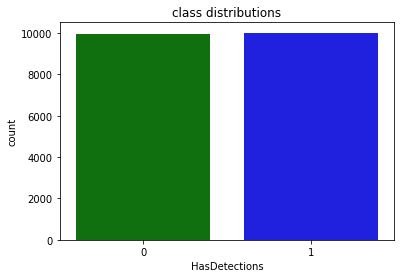

In [ ]:
colors = ['green', 'blue']
sns.countplot('HasDetections', data= df , palette=colors)
plt.title('class distributions')

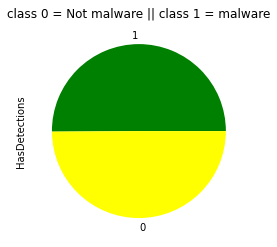

In [ ]:
colors = ["green", "yellow"]
df["HasDetections"].value_counts().plot.pie(colors = colors)
plt.title("class 0 = Not malware || class 1 = malware")
plt.show()

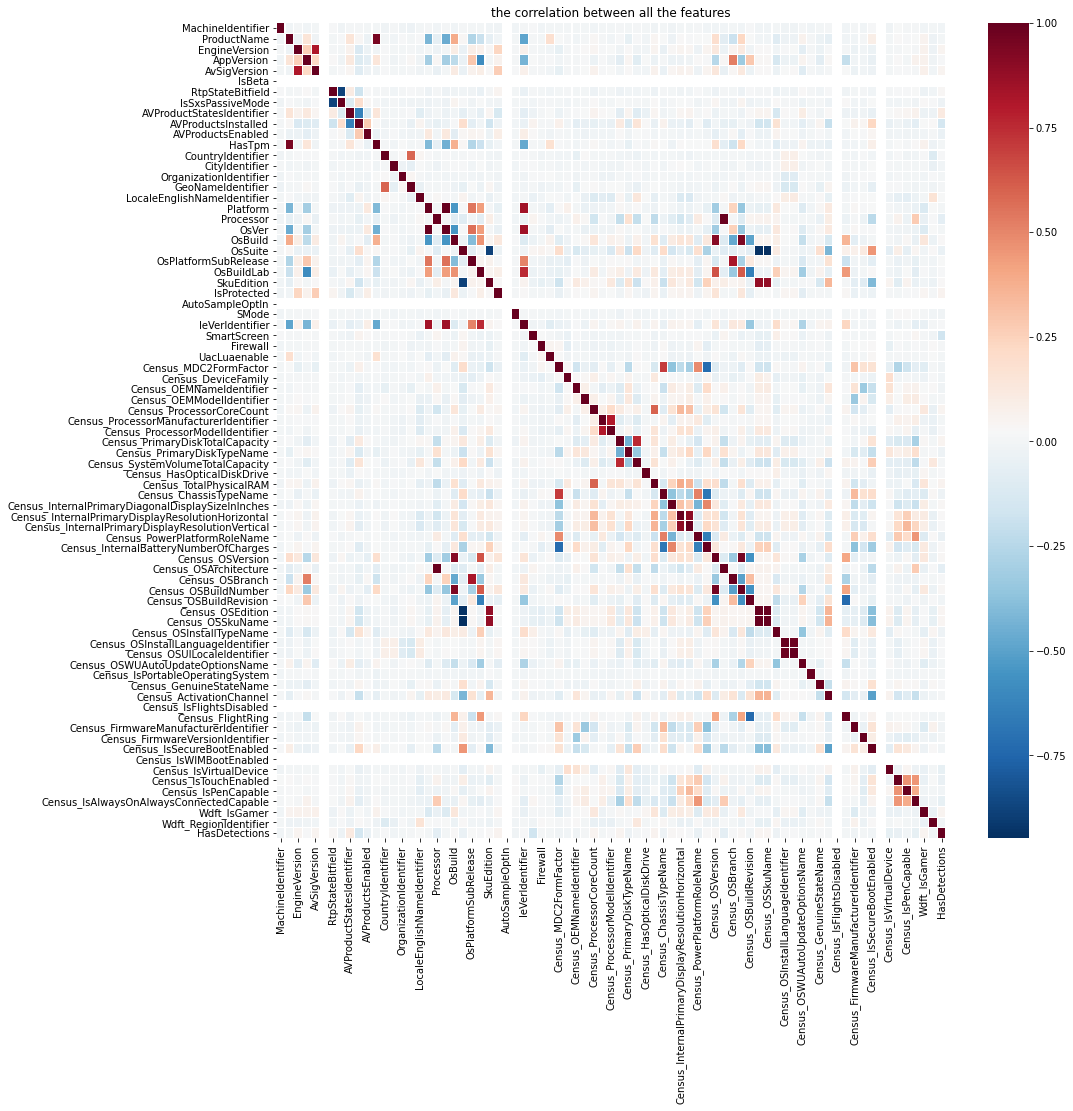

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), linewidths=.1, cmap='RdBu_r')
plt.title('the correlation between all the features')
plt.show()

Model Implementation

In [ ]:
df.shape

(20000, 77)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['HasDetections'])
y= df['HasDetections']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
2081,2081,1,33,31,1439,0,7.0,0,27027.0,2.0,1.0,1,60,108550.0,27.0,240,233,0,1,0,17134,768,4,155,4,1.0,0,0.0,137.0,2,1.0,1.0,7,0,2668.0,171162.0,2.0,5.0,2033.0,476940.0,0,437617.0,0,4096.0,13,13.2,1366.0,768.0,3,0.000000e+00,182,0,5,17134,228,1,1,7,9.0,34,2,0,1,0,0.0,3,628.0,27743.0,1,0.0,0.0,0,0,0.0,0.0,15.0
8089,8089,1,32,28,1073,0,7.0,0,53447.0,1.0,1.0,1,214,58607.0,50.0,277,75,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,5,1.0,1.0,2,0,2668.0,171081.0,4.0,5.0,2582.0,953869.0,0,329476.0,0,8192.0,13,65.0,1920.0,1080.0,1,4.294967e+09,180,0,5,17134,167,10,11,7,8.0,31,2,0,1,4,0.0,3,644.0,24674.0,0,0.0,0.0,0,0,0.0,0.0,1.0
18242,18242,1,34,31,1968,0,7.0,0,53447.0,1.0,1.0,1,162,128794.0,27.0,206,232,0,1,0,14393,768,1,77,4,1.0,0,0.0,94.0,5,1.0,1.0,7,0,2668.0,171320.0,4.0,5.0,3397.0,953869.0,0,909706.0,0,4096.0,13,15.5,1366.0,768.0,3,0.000000e+00,102,0,0,14393,5,1,1,4,8.0,31,3,0,1,0,0.0,3,628.0,8789.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4033,4033,1,33,31,1576,0,7.0,0,53447.0,1.0,1.0,1,13,106223.0,18.0,277,75,0,1,0,16299,768,3,152,4,1.0,0,0.0,117.0,5,1.0,1.0,7,0,4490.0,307233.0,4.0,5.0,2525.0,476940.0,0,475543.0,0,8192.0,13,15.5,1366.0,768.0,3,0.000000e+00,164,0,3,16299,492,1,1,6,8.0,31,3,0,1,2,0.0,3,556.0,56962.0,1,0.0,0.0,0,0,0.0,1.0,10.0
9301,9301,1,34,31,1960,0,7.0,0,53447.0,1.0,1.0,1,6,157364.0,18.0,2,124,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,1,1.0,1.0,2,0,4909.0,317701.0,1.0,1.0,1319.0,953869.0,2,477202.0,0,8192.0,4,17.1,1280.0,1024.0,1,4.294967e+09,182,0,5,17134,228,10,11,8,18.0,72,2,0,1,2,0.0,3,142.0,53026.0,0,0.0,0.0,0,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,1,34,31,2005,0,7.0,0,51954.0,2.0,1.0,1,141,124336.0,27.0,167,227,0,1,0,15063,768,2,147,4,1.0,0,0.0,108.0,5,1.0,1.0,7,0,2668.0,170877.0,4.0,1.0,877.0,953869.0,0,906986.0,0,8192.0,13,15.3,1366.0,768.0,3,0.000000e+00,115,0,1,15063,1088,4,4,7,9.0,34,3,0,1,0,0.0,3,628.0,21288.0,1,0.0,0.0,0,0,0.0,1.0,10.0
17585,17585,1,34,18,2088,0,7.0,0,53447.0,1.0,1.0,1,12,52452.0,18.0,15,42,0,1,0,17134,256,4,155,6,1.0,0,0.0,137.0,1,1.0,1.0,3,0,3150.0,313504.0,4.0,5.0,2703.0,244198.0,1,2419

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
6344,0.317216,1.0,0.638889,0.257576,0.239502,0.0,0.875,0.0,0.112584,0.25,0.25,1.0,0.194570,0.541819,0.509804,0.190476,0.768683,0.0,0.5,0.0,0.855948,1.000000,0.375,0.617886,0.571429,1.0,0.0,0.0,0.226087,0.125,1.0,1.0,0.7,0.0,0.338677,0.702019,0.025641,0.444444,0.449160,0.122546,0.000000,0.156631,0.0,0.027451,0.565217,0.117801,0.141797,0.12,0.428571,0.000000e+00,0.767773,0.0,0.230769,0.805397,0.023976,0.2500,0.285714,1.000,0.236842,0.192308,0.6,0.0,0.333333,0.0,0.0,0.5,0.504699,0.458775,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642857
5122,0.256113,1.0,0.916667,0.469697,0.656668,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.276018,0.358572,0.333333,0.295918,0.277580,0.0,0.5,0.0,0.855948,0.319149,0.375,0.617886,0.857143,1.0,0.0,0.0,0.226087,0.125,1.0,1.0,0.2,0.0,0.228624,0.907536,0.076923,0.444444,0.551067,0.247897,0.000000,0.166767,1.0,0.043137,0.173913,0.217277,0.250000,0.25,0.142857,1.000000e+00,0.786730,0.0,0.230769,0.805397,0.030429,0.6250,0.785714,1.000,0.184211,0.166667,0.0,0.0,0.000000,0.4,0.0,0.5,0.317669,0.276553,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000
12537,0.626881,1.0,0.916667,0.469697,0.761883,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.425339,0.003723,0.333333,0.938776,0.259786,0.0,0.5,0.0,0.938109,0.319149,0.500,0.630081,0.857143,1.0,0.0,0.0,0.284058,0.125,1.0,1.0,0.7,0.0,0.433200,0.495808,0.076923,0.444444,0.538811,0.122546,0.000000,0.039923,0.0,0.027451,0.565217,0.138743,0.250000,0.25,0.428571,0.000000e+00,0.848341,0.0,0.384615,0.916390,0.009179,0.6250,0.785714,0.750,0.184211,0.166667,0.4,0.0,0.333333,0.8,0.0,0.5,0.574248,0.058025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286
10353,0.517676,1.0,0.916667,0.272727,0.709737,0.0,0.875,0.0,0.112584,0.25,0.25,1.0,0.990950,0.239781,0.333333,0.802721,0.259786,0.0,0.5,0.0,0.938109,1.000000,0.500,0.630081,0.571429,1.0,0.0,0.0,0.284058,0.125,1.0,1.0,0.7,0.0,0.228624,0.742855,0.076923,0.444444,0.534271,0.122546,0.000000,0.158781,0.0,0.027451,0.304348,0.138743,0.141797,0.12,0.428571,0.000000e+00,0.843602,0.0,0.384615,0.916390,0.007621,0.2500,0.285714,0.750,0.184211,0.166667,0.6,0.0,0.333333,0.0,0.0,0.5,0.317669,0.280716,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.714286
4819,0.240962,1.0,0.944444,0.469697,0.951546,0.0,0.875,0.0,0.760549,0.00,0.25,1.0,0.235294,0.262084,0.509804,0.238095,0.177936,0.0,0.5,0.0,0.938109,1.000000,0.500,0.630081,0.571429,1.0,0.0,0.0,0.284058,0.125,1.0,1.0,0.7,0.0,0.085337,0.550231,0.179487,0.444444,0.663414,0.061375,0.333333,0.081613,0.0,0.121569,0.565217,0.162304,0.250000,0.25,0.428571,0.000000e+00,0.862559,0.0,0.384615,0.916390,0.012684,0.0625,0.071429,0.625,0.078947,0.121795,0.4,0.0,0.333333,0.4,0.0,0.5,0.506579,0.879731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7478,0.373919,1.0,0.944444,0.469697,0.910014,0.0,0.875,0.0,0.672130,0.25,0.25,1.0,0.036199,0.500161,0.509804,0.030612,0.754448,0.0,0.5,0.0,0.938109,1.000000,0.500,0.630081,0.571429,1.0,0.0,0.0,0.284058,0.625,1.0,1.0,0.1,0.0,0.433200,0.495771,0.076923,0.444444,0.536314,0.247897,0.000000,0.317251,0.0,0.027451,0.130435,0.117801,0.250000,0.25,0.428571,0.000000e+00,0.862559,0.0,0.384615,0.916390,0.012684,0.2500,0.285714,1.000,0.210526,0.185897,0.4,0.0,0.333333,0.0,0.0,0.5,0.574248,0.057845,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.642857
16119,0.805990,1.0,0.916667,0.469697,0.603599,0.0,0.875,0.0,0.089486,0.50,0.25,1.0,0.294118,0.549200,0.509804,0.299320,0.306050,0.0,0.5,0.0,0.855948,0.319149,0.375,0.617886,0.857143,1.0,0.0,0.0,0.226087,0.625,1.0,0.0,0.2,0.0,0.433200,0.481550,0.025641,0.444444,0.977077,0.077420,0.000000,0.059637,0.0,0.011765

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.5978333333333333

In [ ]:
roc_auc_score(y_test, y_pred)

0.5977982135172549

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6031902647590857

Random forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfm = RandomForestClassifier()

In [ ]:
rfm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred2 = rfm.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.61

In [ ]:
metrics.f1_score(y_test, y_pred2)

0.6027164685908318

In [ ]:
roc_auc_score(y_test, y_pred2)

0.6100604905444149

K nearest Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knearest = KNeighborsClassifier()

In [ ]:
knearest.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred3 = knearest.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred3)

0.546

In [ ]:
roc_auc_score(y_test, y_pred3)

0.5459369134322208

In [ ]:
metrics.f1_score(y_test, y_pred3)

0.5560625814863104